In [697]:
#importing libraries
import pandas as pd
import numpy as np
import plotly as px
import matplotlib as plt
import seaborn as sns

In [698]:
df = pd.read_csv("C:\\Users\\karee\\Downloads\\Expanded_data_with_more_features.csv")
df.head(5) #print the first 5 rows

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [699]:
df.columns #print columns in the dataframe

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore',
       'ReadingScore', 'WritingScore'],
      dtype='object')

In [700]:
#we have an unnecessary column, 'Unamed: 0', which seems to be an index column. 
#we will remove this column, as it provides no utility at this moment, or for the 
#model we will create later

df = df.drop('Unnamed: 0', axis=1)
df.head(5) #shows the column has been dropped

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [701]:
#I want to return the datatypes of each feature:
df.dtypes

Gender                  object
EthnicGroup             object
ParentEduc              object
LunchType               object
TestPrep                object
ParentMaritalStatus     object
PracticeSport           object
IsFirstChild            object
NrSiblings             float64
TransportMeans          object
WklyStudyHours          object
MathScore                int64
ReadingScore             int64
WritingScore             int64
dtype: object

In [702]:
#all of our features are objects except NrSibligns
#MathScore, ReadingScore, WritingScore are our target values

#lets summarize the dataset (the numeric values)
df.describe()

,NrSiblings,MathScore,ReadingScore,WritingScore
count,29069.000000,30641.000000,30641.000000,30641.000000
mean,2.145894,66.558402,69.377533,68.418622
std,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,10.000000,4.000000
25%,1.000000,56.000000,59.000000,58.000000
50%,2.000000,67.000000,70.000000,69.000000
75%,3.000000,78.000000,80.000000,79.000000
max,7.000000,100.000000,100.000000,100.000000


In [703]:
#Weekly study hours currently is in an improper format
#Lets fix this

#first, lets view the unique weekly study hours values:
df['WklyStudyHours'].unique()

array(['< 5', '5 - 10', '> 10', nan], dtype=object)

In [704]:
#there are four values in this column:
#less than 5, 5 to 10, greater than 10, and nan

#lets see how many nulls there are in this column
df['WklyStudyHours'].isna().sum()

955

In [705]:
#of the 30641 rows, 955 have null weekly hours studied. 

# Create a copy of the original DataFrame to preserve the original data
df2 = df.copy()

# Calculate the mode of the 'WklyStudyHours' column
mode_value = df['WklyStudyHours'].mode()[0]

# Fill NaN values with the mode in 'WklyStudyHours' column
df2['WklyStudyHours'].fillna(mode_value, inplace=True)

# Check the unique values after filling NaNs
unique_values = df2['WklyStudyHours'].unique()
print(unique_values)
df2['WklyStudyHours'].isna().sum() #the number of nan values after filling it

['< 5' '5 - 10' '> 10']


0

In [706]:
#lets view the NaN values
df2.isna().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours            0
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [707]:
#first, lets view the unique EthnicGroup values:
df['EthnicGroup'].unique()

array([nan, 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

In [708]:
# Calculate the mode of the 'EthnicGroup' column
mode_value = df['EthnicGroup'].mode()[0]

# Fill NaN values with the mode in 'EthnicGroup' column
df2['EthnicGroup'].fillna(mode_value, inplace=True)

# Check the unique values after filling NaNs
unique_values = df2['EthnicGroup'].unique()
print(unique_values)
df2['EthnicGroup'].isna().sum() #the number of nan values after filling it

['group C' 'group B' 'group A' 'group D' 'group E']


0

In [709]:
#first, lets view the unique ParentEduc values:
df['ParentEduc'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school', nan],
      dtype=object)

In [710]:
# Calculate the mode of the 'ParentEduc' column
mode_value = df['ParentEduc'].mode()[0]

# Fill NaN values with the mode in 'ParentEduc' column
df2['ParentEduc'].fillna(mode_value, inplace=True)

# Check the unique values after filling NaNs
unique_values = df2['ParentEduc'].unique()
print(unique_values)
df2['ParentEduc'].isna().sum() #the number of nan values after filling it

["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


0

In [711]:
#first, lets view the unique TestPrep values:
df['TestPrep'].unique()

array(['none', nan, 'completed'], dtype=object)

In [712]:
# Calculate the mode of the 'TestPrep' column
mode_value = df['TestPrep'].mode()[0]

# Fill NaN values with the mode in 'TestPrep' column
df2['TestPrep'].fillna(mode_value, inplace=True)

# Check the unique values after filling NaNs
unique_values = df2['TestPrep'].unique()
print(unique_values)
df2['TestPrep'].isna().sum() #the number of nan values after filling it

['none' 'completed']


0

In [713]:
#first, lets view the unique ParentMaritalStatus values:
df['ParentMaritalStatus'].unique()

array(['married', 'single', 'widowed', nan, 'divorced'], dtype=object)

In [714]:
# Calculate the mode of the 'ParentMaritalStatus' column
mode_value = df['ParentMaritalStatus'].mode()[0]

# Fill NaN values with the mode in 'ParentMaritalStatus' column
df2['ParentMaritalStatus'].fillna(mode_value, inplace=True)

# Check the unique values after filling NaNs
unique_values = df2['ParentMaritalStatus'].unique()
print(unique_values)
df2['ParentMaritalStatus'].isna().sum() #the number of nan values after filling it

['married' 'single' 'widowed' 'divorced']


0

In [715]:
#first, lets view the unique PracticeSport values:
df['PracticeSport'].unique()

array(['regularly', 'sometimes', 'never', nan], dtype=object)

In [716]:
# Calculate the mode of the 'PracticeSport' column
mode_value = df['PracticeSport'].mode()[0]

# Fill NaN values with the mode in 'PracticeSport' column
df2['PracticeSport'].fillna(mode_value, inplace=True)

# Check the unique values after filling NaNs
unique_values = df2['PracticeSport'].unique()
print(unique_values)
df2['PracticeSport'].isna().sum() #the number of nan values after filling it

['regularly' 'sometimes' 'never']


0

In [717]:

#first, lets view the unique IsFirstChild values:
df['IsFirstChild'].unique()

array(['yes', 'no', nan], dtype=object)

In [718]:
# Calculate the mode of the 'IsFirstChild' column
mode_value = df['IsFirstChild'].mode()[0]

# Fill NaN values with the mode in 'IsFirstChild' column
df2['IsFirstChild'].fillna(mode_value, inplace=True)

# Check the unique values after filling NaNs
unique_values = df2['IsFirstChild'].unique()
print(unique_values)
df2['IsFirstChild'].isna().sum() #the number of nan values after filling it

['yes' 'no']


0

In [719]:


#first, lets view the unique NrSiblings values:
df['NrSiblings'].unique()

array([ 3.,  0.,  4.,  1., nan,  2.,  5.,  7.,  6.])

In [720]:
# Calculate the mode of the 'NrSiblings' column
mode_value = df['NrSiblings'].mode()[0]

# Fill NaN values with the mode in 'NrSiblings' column
df2['NrSiblings'].fillna(mode_value, inplace=True)

# Check the unique values after filling NaNs
unique_values = df2['NrSiblings'].unique()
print(unique_values)
df2['NrSiblings'].isna().sum() #the number of nan values after filling it

[3. 0. 4. 1. 2. 5. 7. 6.]


0

In [721]:

#first, lets view the unique TransportMeans values:
df['TransportMeans'].unique()


array(['school_bus', nan, 'private'], dtype=object)

In [722]:
# Calculate the mode of the 'TransportMeans' column
mode_value = df['TransportMeans'].mode()[0]

# Fill NaN values with the mode in 'TransportMeans' column
df2['TransportMeans'].fillna(mode_value, inplace=True)

# Check the unique values after filling NaNs
unique_values = df2['TransportMeans'].unique()
print(unique_values)
df2['TransportMeans'].isna().sum() #the number of nan values after filling it

['school_bus' 'private']


0

In [723]:
#lets view the NaN values
df2.isna().sum()

Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

In [724]:
df2.head()
#I see multiple 'NaN' values outside of this feature
#We need to decide how to handle these rows

#they aren't numeric values, so we cannot substitute them with the means
#we will fix this after the EDA (exploratory data analysis)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,group C,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,school_bus,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


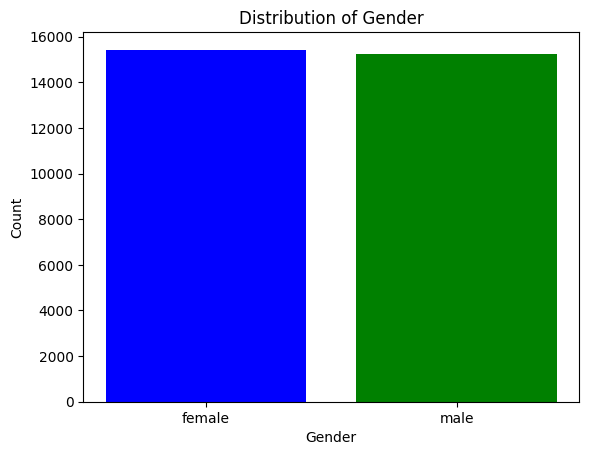

In [725]:
#gender distribution
import matplotlib.pyplot as plt
gender_counts = df2['Gender'].value_counts()
colors = ['blue', 'green']  # Add more colors as needed
plt.bar(gender_counts.index, gender_counts.values, color=colors)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()

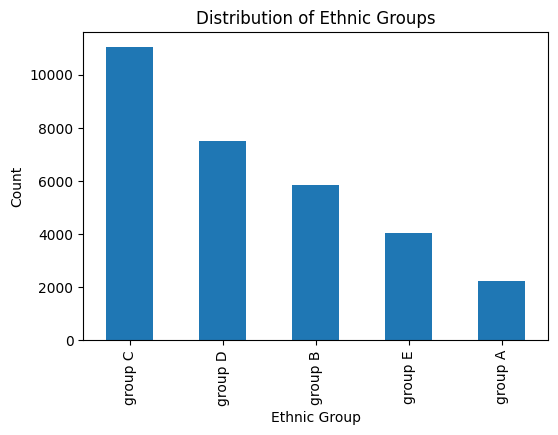

In [726]:
#ethnic group distribution
plt.figure(figsize=(6,4))
df2['EthnicGroup'].value_counts().plot(kind='bar')
plt.xlabel('Ethnic Group')
plt.ylabel('Count')
plt.title('Distribution of Ethnic Groups')
plt.show()


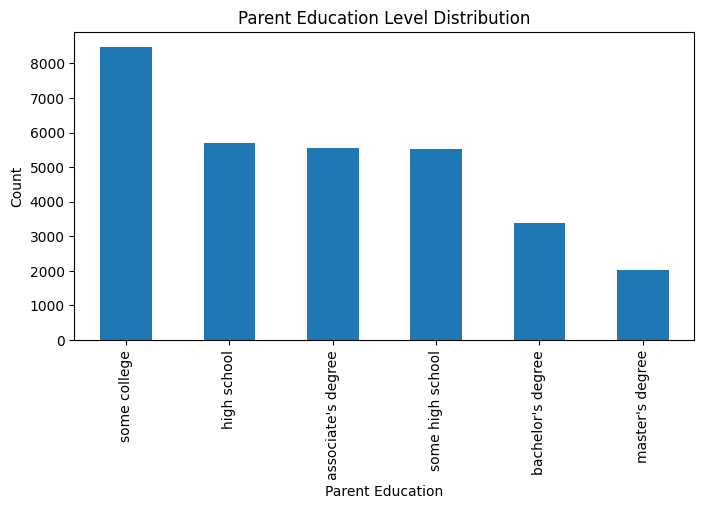

In [727]:
#parent education distribution
plt.figure(figsize=(8,4))
df2['ParentEduc'].value_counts().plot(kind='bar')
plt.xlabel('Parent Education')
plt.ylabel('Count')
plt.title('Parent Education Level Distribution')
plt.show()

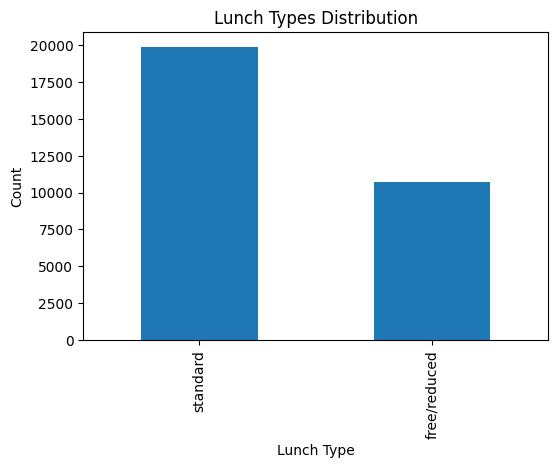

In [728]:
#lunchtype distribution
plt.figure(figsize=(6,4))
df2['LunchType'].value_counts().plot(kind='bar')
plt.xlabel('Lunch Type')
plt.ylabel('Count')
plt.title('Lunch Types Distribution')
plt.show()

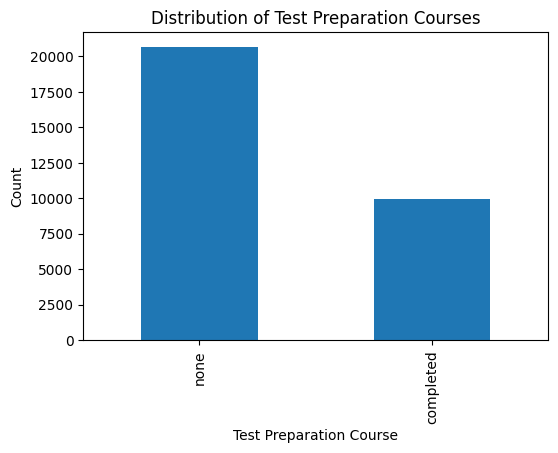

In [729]:

#testprep distribution
plt.figure(figsize=(6,4))
df2['TestPrep'].value_counts().plot(kind='bar')
plt.xlabel('Test Preparation Course')
plt.ylabel('Count')
plt.title('Distribution of Test Preparation Courses')
plt.show()

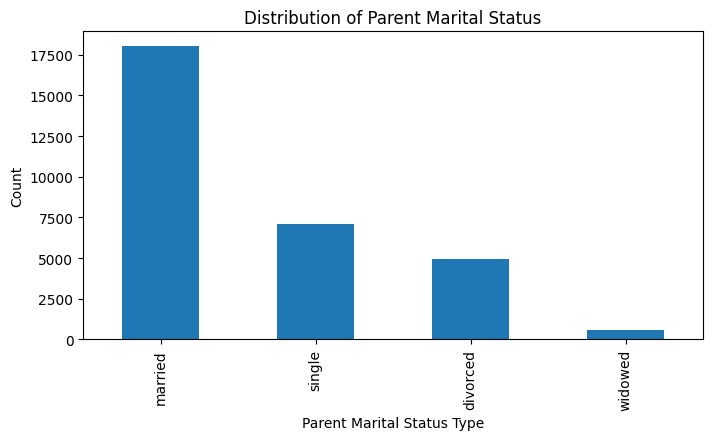

In [730]:
#parent marital status distribution
plt.figure(figsize=(8,4))
df2['ParentMaritalStatus'].value_counts().plot(kind='bar')
plt.xlabel('Parent Marital Status Type')
plt.ylabel('Count')
plt.title('Distribution of Parent Marital Status')
plt.show()

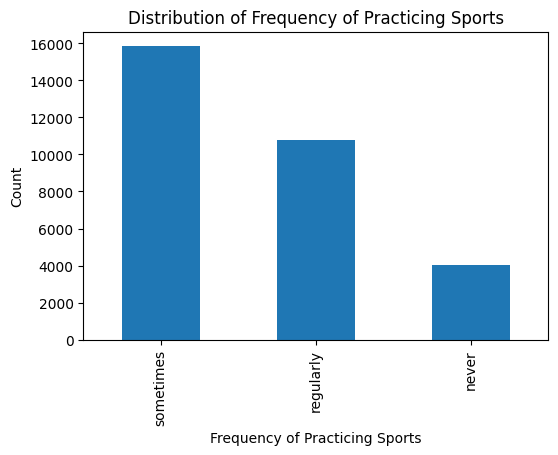

In [731]:
#frequency of practicing sports
plt.figure(figsize=(6,4))
df2['PracticeSport'].value_counts().plot(kind='bar')
plt.xlabel('Frequency of Practicing Sports')
plt.ylabel('Count')
plt.title('Distribution of Frequency of Practicing Sports')
plt.show()

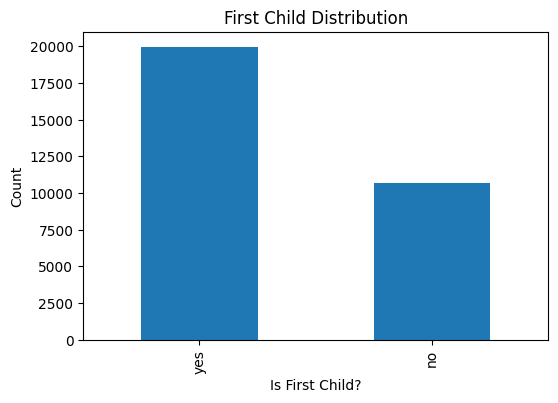

In [732]:
#firstchild distribution
plt.figure(figsize=(6,4))
df2['IsFirstChild'].value_counts().plot(kind='bar')
plt.xlabel('Is First Child?')
plt.ylabel('Count')
plt.title('First Child Distribution')
plt.show()

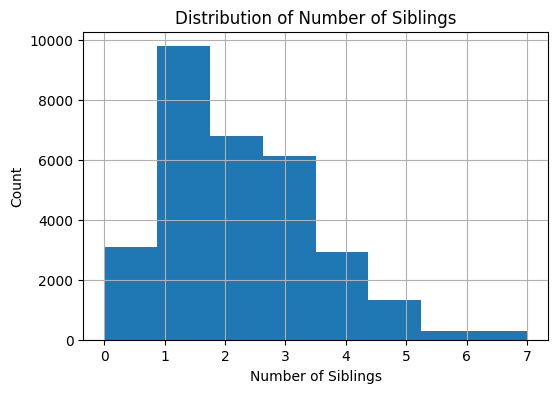

In [733]:
#number of siblings
plt.figure(figsize=(6,4))
df2['NrSiblings'].hist(bins=8)
plt.xlabel('Number of Siblings')
plt.ylabel('Count')
plt.title('Distribution of Number of Siblings')
plt.show()

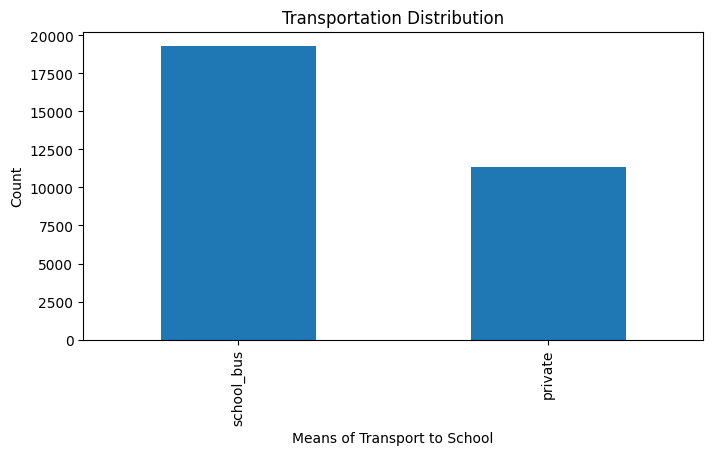

In [734]:
#transportation means
plt.figure(figsize=(8,4))
df2['TransportMeans'].value_counts().plot(kind='bar')
plt.xlabel('Means of Transport to School')
plt.ylabel('Count')
plt.title('Transportation Distribution')
plt.show()

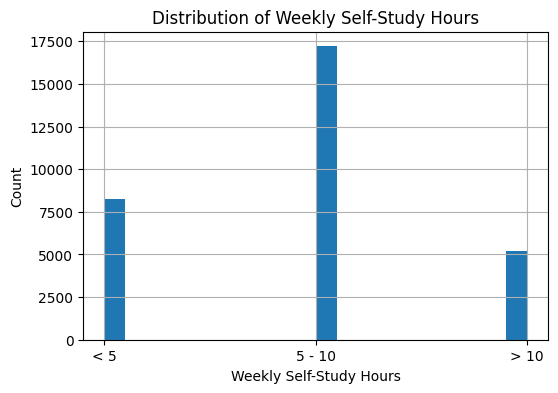

In [735]:
#Study Hours Distribution
plt.figure(figsize=(6,4))
df2['WklyStudyHours'].hist(bins=20)
plt.xlabel('Weekly Self-Study Hours')
plt.ylabel('Count')
plt.title('Distribution of Weekly Self-Study Hours')
plt.show()

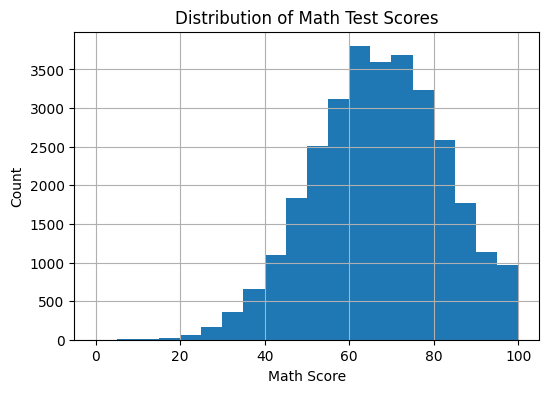

In [736]:
#Math Scores
plt.figure(figsize=(6,4))
df2['MathScore'].hist(bins=20)
plt.xlabel('Math Score')
plt.ylabel('Count')
plt.title('Distribution of Math Test Scores')
plt.show()

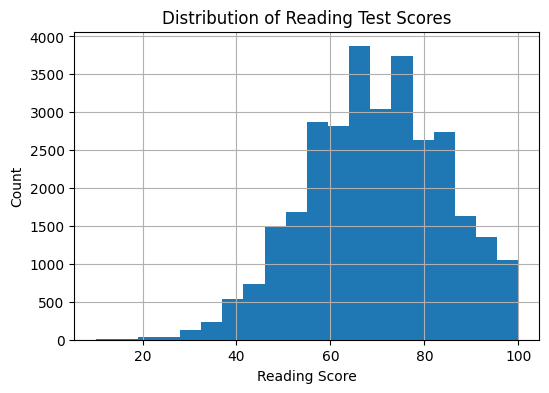

In [737]:
#Reading Scores
plt.figure(figsize=(6,4))
df2['ReadingScore'].hist(bins=20)
plt.xlabel('Reading Score')
plt.ylabel('Count')
plt.title('Distribution of Reading Test Scores')
plt.show()

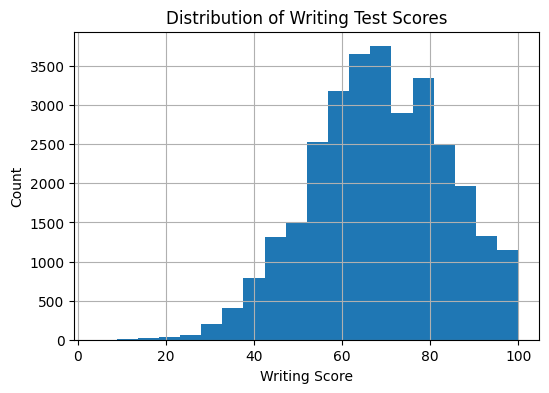

In [738]:
#Writing Scores
plt.figure(figsize=(6,4))
df2['WritingScore'].hist(bins=20)
plt.xlabel('Writing Score')
plt.ylabel('Count')
plt.title('Distribution of Writing Test Scores')
plt.show()

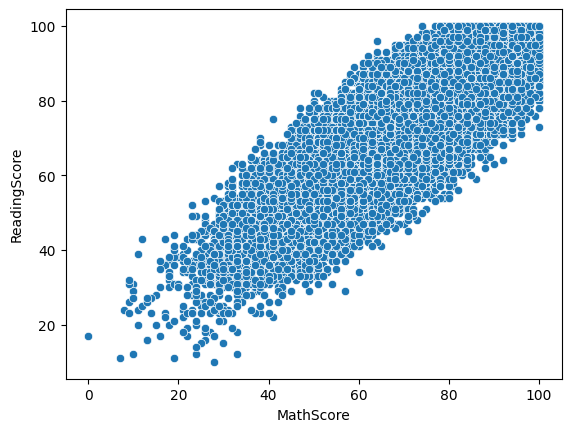

In [739]:
#Scatterplot between Math and Reading
sns.scatterplot(x='MathScore', y='ReadingScore', data=df2)
plt.show()

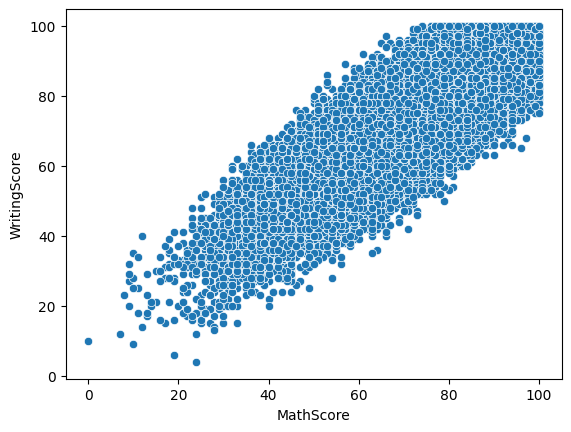

In [740]:
#Scatterplot between Math and Writing
sns.scatterplot(x='MathScore', y='WritingScore', data=df2)
plt.show()

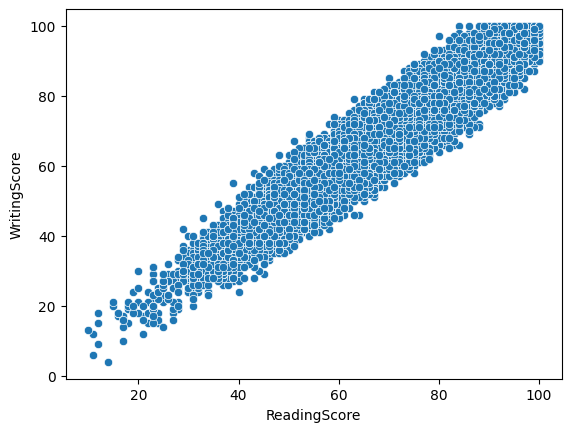

In [741]:
#Scatterplot between Reading and Writing
sns.scatterplot(x='ReadingScore', y='WritingScore', data=df2)
plt.show()

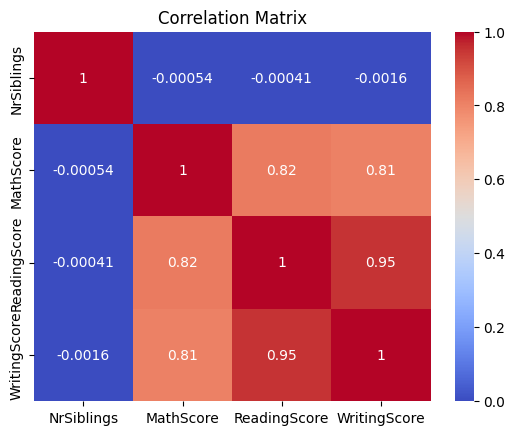

In [742]:
#Reading and Writing have a more narrow distribution
#correlation map
subset_df = df2[['NrSiblings', 'MathScore', 'ReadingScore', 'WritingScore']]
corr = subset_df.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [743]:
#starts preprcsessing
#we can drop these values, but we may have significantly less data to use. 
#lets see the difference
df_dropped = df2.dropna().copy()

rows_df2 = df2.shape[0]
rows_df_dropped = df_dropped.shape[0]
print("Number of rows in df2:", rows_df2)
print("Number of rows in df_dropped:", rows_df_dropped)
print("Percentage of Rows that Remain:", rows_df_dropped / rows_df2)

Number of rows in df2: 30641
Number of rows in df_dropped: 30641
Percentage of Rows that Remain: 1.0


In [744]:
#uniquevalues
#I want to prevent later having "curse of dimensionality"
column_counts = df2.nunique()
print(column_counts)

Gender                  2
EthnicGroup             5
ParentEduc              6
LunchType               2
TestPrep                2
ParentMaritalStatus     4
PracticeSport           3
IsFirstChild            2
NrSiblings              8
TransportMeans          2
WklyStudyHours          3
MathScore              95
ReadingScore           90
WritingScore           93
dtype: int64


In [745]:
df2.shape


(30641, 14)

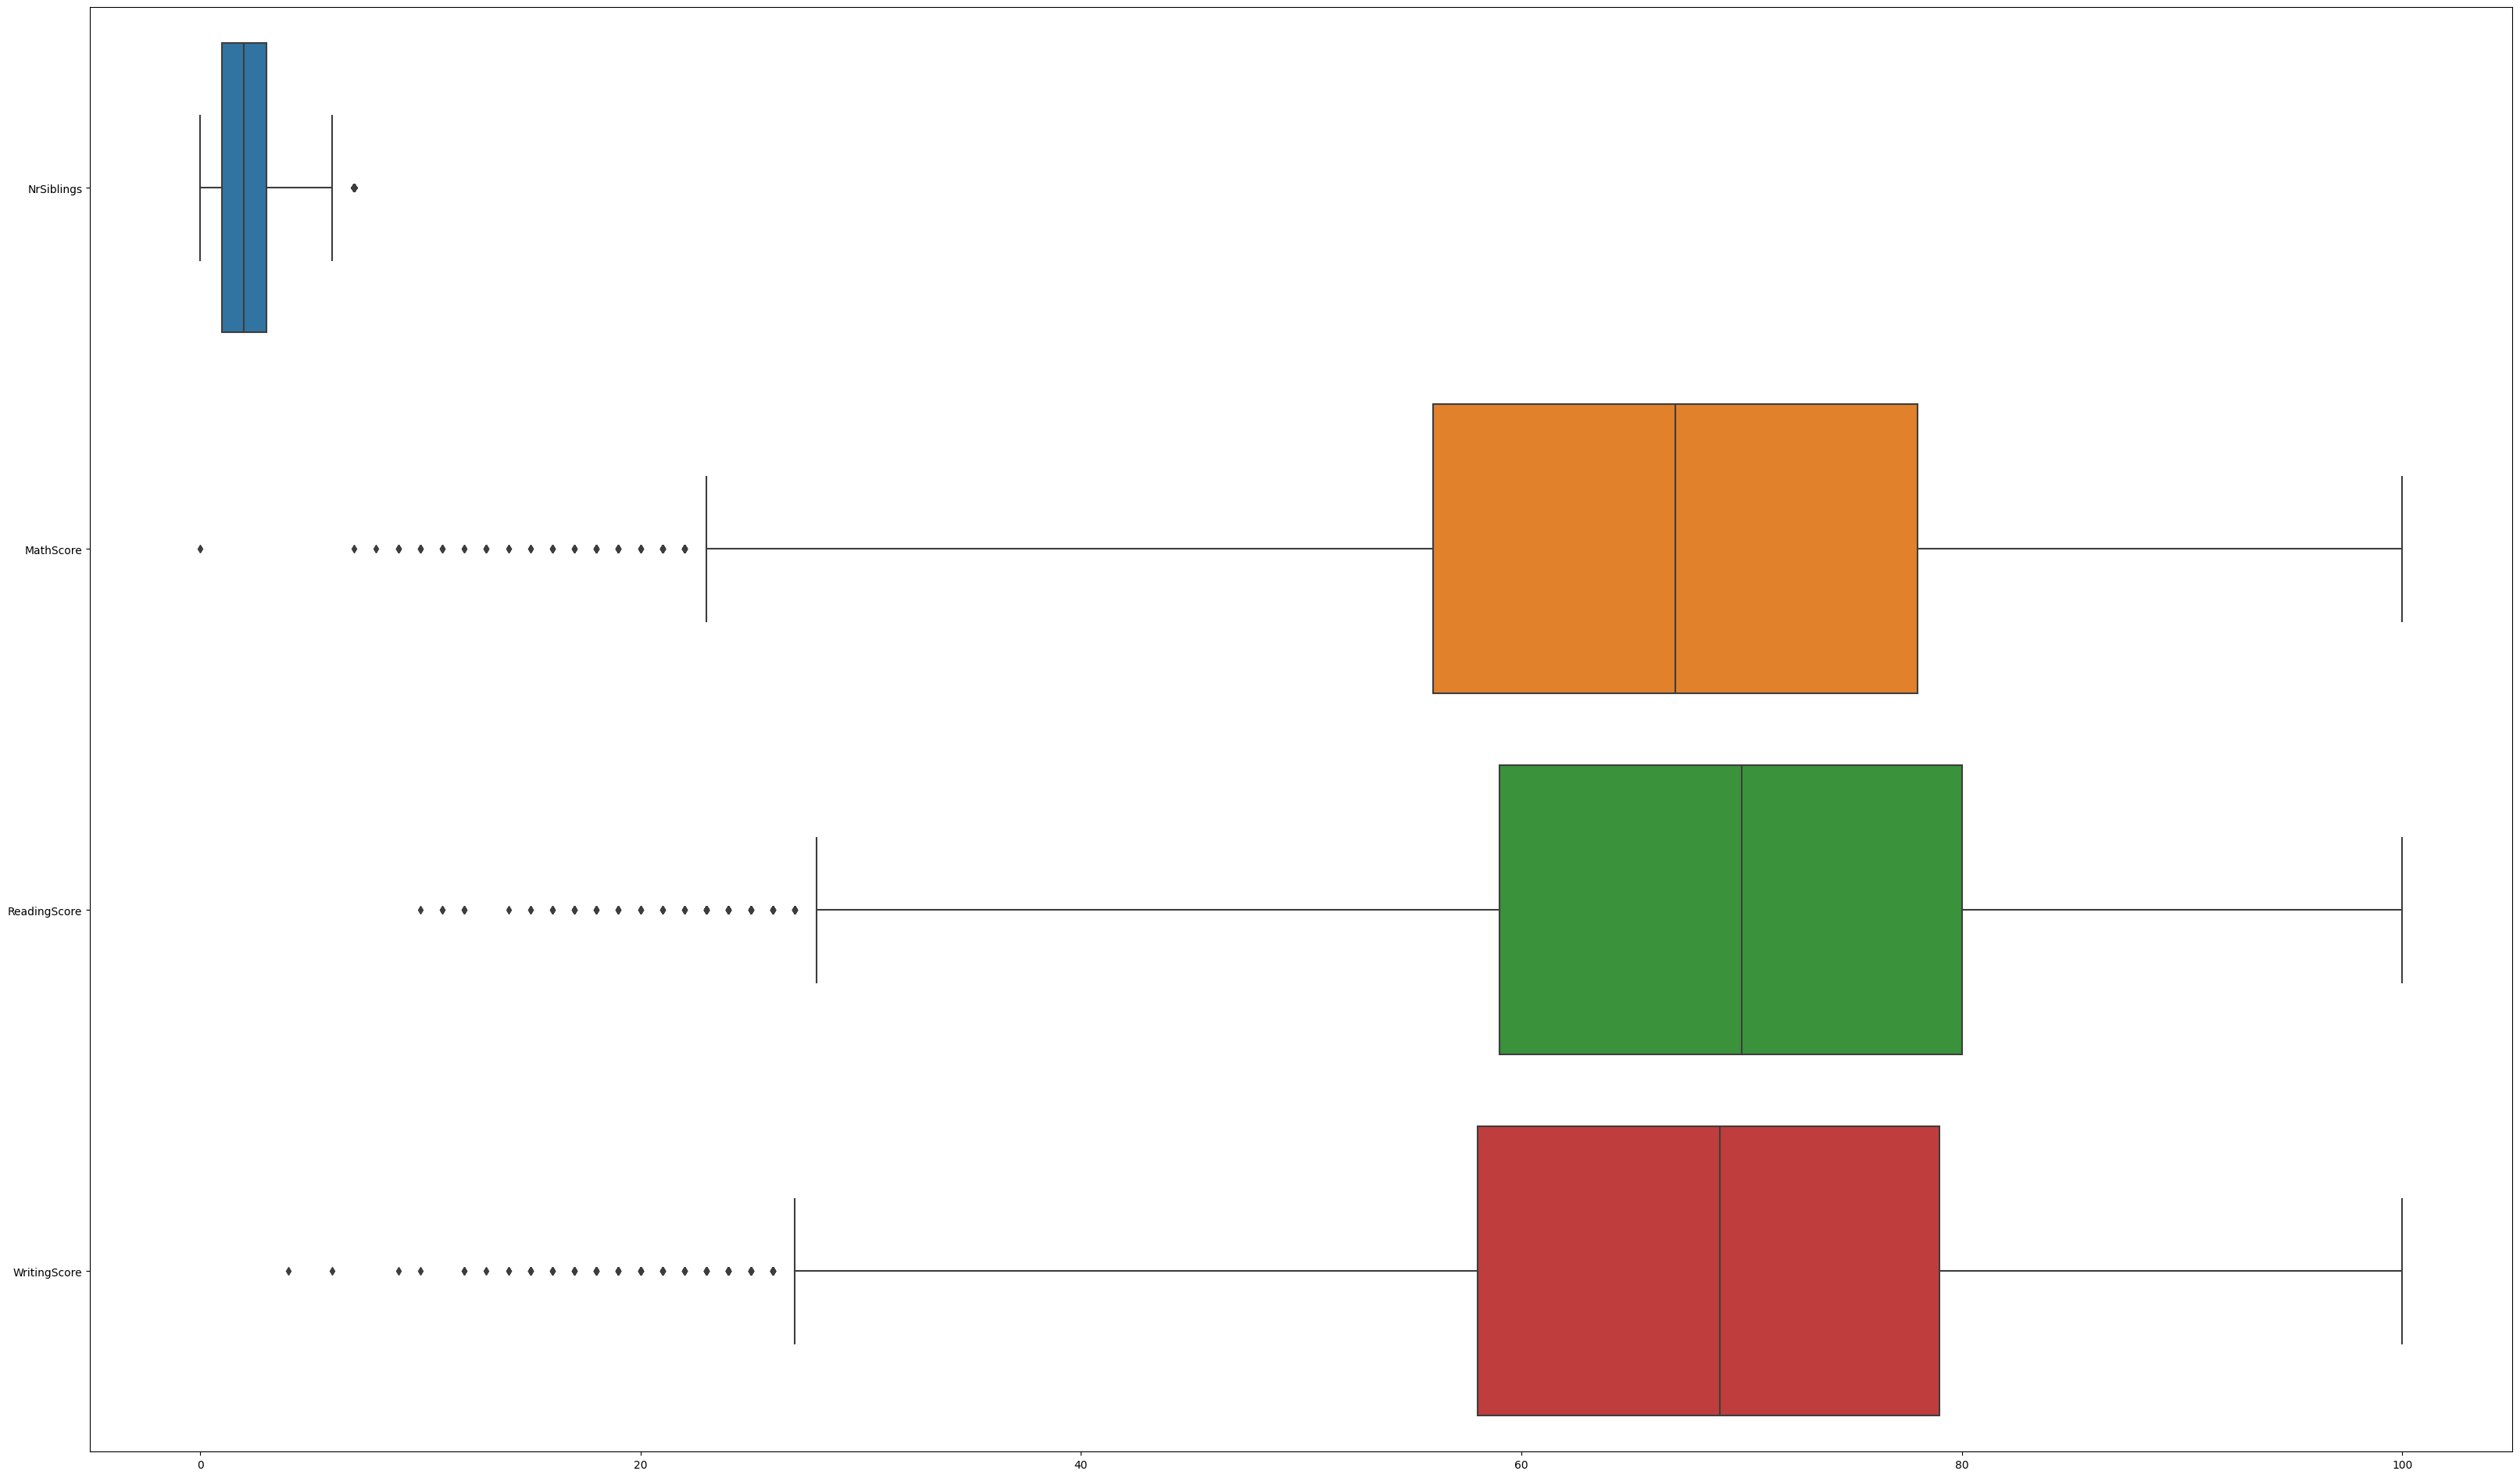

In [746]:
plt.figure(figsize=(40,24))
sns.boxplot(data=df2,orient='h')
plt.show()

In [747]:
df2.shape

(30641, 14)

In [748]:
for label in df2.columns:
    if label not in ['MathScore','ReadingScore','WritingScore']:
        print(f'{label}',df2[label].unique())

Gender ['female' 'male']
EthnicGroup ['group C' 'group B' 'group A' 'group D' 'group E']
ParentEduc ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
LunchType ['standard' 'free/reduced']
TestPrep ['none' 'completed']
ParentMaritalStatus ['married' 'single' 'widowed' 'divorced']
PracticeSport ['regularly' 'sometimes' 'never']
IsFirstChild ['yes' 'no']
NrSiblings [3. 0. 4. 1. 2. 5. 7. 6.]
TransportMeans ['school_bus' 'private']
WklyStudyHours ['< 5' '5 - 10' '> 10']


In [749]:
#Categorical Data Preprocessing

#-----------------------------------------#

#Gender: Label Encoding
#EthnicGroup: ordinal encoding
#ParentEduc: Ordinal Encoding
#LunchType: One-Hot Encoding
#TestPrep: Label Encoding
#ParentMaritalStatus: One-Hot Encoding
#PracticeSport: Ordinal Encoding
#IsFirstChild: Label Encoding
#NrSiblings: Already Numerical
#TranportMeans: One-Hot Encoding
#WklyStudyHours: One-Hot Encoding

#-----------------------------------------#

In [750]:
#gender
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df2['gender_encoded'] = label_encoder.fit_transform(df2['Gender'])
df2.drop('Gender', axis=1, inplace=True)
df2.head()

,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,gender_encoded
0,group C,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,0
1,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,69,90,88,0
2,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,0
3,group A,associate's degree,free/reduced,none,married,never,no,1.0,school_bus,5 - 10,45,56,42,1
4,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,1


In [751]:
#ParentEduc Ordinal Encoding
#define the ordinal mapping dictionary
ordinal_mapping = {
    'some high school': 0,
    'high school': 1,
    'some college': 2,
    "associate's degree": 3,
    "bachelor's degree": 4,
    "master's degree": 5,
}
#calculate the maximum ordinal value
max_ordinal = max(ordinal_mapping.values())
#apply ordinal encoding and scaling to the 'ParentEduc' column
df2['ParentEduc_encoded'] = df2['ParentEduc'].map(ordinal_mapping) / max_ordinal
df2.drop('ParentEduc', axis=1, inplace=True)
df2.head()


,EthnicGroup,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,gender_encoded,ParentEduc_encoded
0,group C,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,0,0.8
1,group C,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,69,90,88,0,0.4
2,group B,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,0,1.0
3,group A,free/reduced,none,married,never,no,1.0,school_bus,5 - 10,45,56,42,1,0.6
4,group C,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,1,0.4


In [752]:
#LunchType
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df2['LunshType_encoded'] = label_encoder.fit_transform(df2['LunchType'])
df2.drop('LunchType', axis=1, inplace=True)
df2.head()

,EthnicGroup,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,gender_encoded,ParentEduc_encoded,LunshType_encoded
0,group C,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,0,0.8,1
1,group C,none,married,sometimes,yes,0.0,school_bus,5 - 10,69,90,88,0,0.4,1
2,group B,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,0,1.0,1
3,group A,none,married,never,no,1.0,school_bus,5 - 10,45,56,42,1,0.6,0
4,group C,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,1,0.4,1


In [753]:
#TestPrep
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df2['TestPrep_Encoded'] = label_encoder.fit_transform(df2['TestPrep'])
df2.drop('TestPrep', axis=1, inplace=True)
df2.head()

,EthnicGroup,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,gender_encoded,ParentEduc_encoded,LunshType_encoded,TestPrep_Encoded
0,group C,married,regularly,yes,3.0,school_bus,< 5,71,71,74,0,0.8,1,1
1,group C,married,sometimes,yes,0.0,school_bus,5 - 10,69,90,88,0,0.4,1,1
2,group B,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,0,1.0,1,1
3,group A,married,never,no,1.0,school_bus,5 - 10,45,56,42,1,0.6,0,1
4,group C,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,1,0.4,1,1


In [754]:
df2['ParentMaritalStatus'].unique()

array(['married', 'single', 'widowed', 'divorced'], dtype=object)

In [755]:
#ParentMartialStatus 
ordinal_mapping = {
    'married': 0,
    'single': 1,
    'widowed': 2,
    "divorced": 3,
   
}
#calculate the maximum ordinal value
max_ordinal = max(ordinal_mapping.values())
#apply ordinal encoding and scaling to the 'ParentEduc' column
df2['ParentMaritalStatus_encoded'] = df2['ParentMaritalStatus'].map(ordinal_mapping) / max_ordinal
df2.drop('ParentMaritalStatus', axis=1, inplace=True)
df2.head()


,EthnicGroup,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,gender_encoded,ParentEduc_encoded,LunshType_encoded,TestPrep_Encoded,ParentMaritalStatus_encoded
0,group C,regularly,yes,3.0,school_bus,< 5,71,71,74,0,0.8,1,1,0.000000
1,group C,sometimes,yes,0.0,school_bus,5 - 10,69,90,88,0,0.4,1,1,0.000000
2,group B,sometimes,yes,4.0,school_bus,< 5,87,93,91,0,1.0,1,1,0.333333
3,group A,never,no,1.0,school_bus,5 - 10,45,56,42,1,0.6,0,1,0.000000
4,group C,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,1,0.4,1,1,0.000000


In [756]:
#PracticeSport
#define the ordinal mapping dictionary
ordinal_mapping1 = {
    'never': 0,
    'sometimes': .5,
    'regularly': 1 
}
#apply ordinal encoding
df2['PracticeSport_Encoded'] = df2['PracticeSport'].map(ordinal_mapping1)
df2.drop('PracticeSport', axis=1, inplace=True)
df2.head()

,EthnicGroup,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,gender_encoded,ParentEduc_encoded,LunshType_encoded,TestPrep_Encoded,ParentMaritalStatus_encoded,PracticeSport_Encoded
0,group C,yes,3.0,school_bus,< 5,71,71,74,0,0.8,1,1,0.000000,1.0
1,group C,yes,0.0,school_bus,5 - 10,69,90,88,0,0.4,1,1,0.000000,0.5
2,group B,yes,4.0,school_bus,< 5,87,93,91,0,1.0,1,1,0.333333,0.5
3,group A,no,1.0,school_bus,5 - 10,45,56,42,1,0.6,0,1,0.000000,0.0
4,group C,yes,0.0,school_bus,5 - 10,76,78,75,1,0.4,1,1,0.000000,0.5


In [757]:
'group C' 'group B' 'group A' 'group D' 'group E'

'group Cgroup Bgroup Agroup Dgroup E'

In [758]:
#ethnicgroup
#define the ordinal mapping dictionary
ordinal_mapping1 = {
    'group A': 0,
    'group B': 1,
    'group C': 2,
    'group D':3,
    'group E':4
}
#apply ordinal encoding
df2['EthnicGroup_Encoded'] = df2['EthnicGroup'].map(ordinal_mapping1)
df2.drop('EthnicGroup', axis=1, inplace=True)
df2.head()

,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,gender_encoded,ParentEduc_encoded,LunshType_encoded,TestPrep_Encoded,ParentMaritalStatus_encoded,PracticeSport_Encoded,EthnicGroup_Encoded
0,yes,3.0,school_bus,< 5,71,71,74,0,0.8,1,1,0.000000,1.0,2
1,yes,0.0,school_bus,5 - 10,69,90,88,0,0.4,1,1,0.000000,0.5,2
2,yes,4.0,school_bus,< 5,87,93,91,0,1.0,1,1,0.333333,0.5,1
3,no,1.0,school_bus,5 - 10,45,56,42,1,0.6,0,1,0.000000,0.0,0
4,yes,0.0,school_bus,5 - 10,76,78,75,1,0.4,1,1,0.000000,0.5,2


In [759]:
#IsFirstChild
from sklearn.preprocessing import LabelEncoder
label_encoder2 = LabelEncoder()
df2['IsFirstChild_Encoded'] = label_encoder2.fit_transform(df2['IsFirstChild'])
df2.drop('IsFirstChild', axis=1, inplace=True)
df2.head()

,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,gender_encoded,ParentEduc_encoded,LunshType_encoded,TestPrep_Encoded,ParentMaritalStatus_encoded,PracticeSport_Encoded,EthnicGroup_Encoded,IsFirstChild_Encoded
0,3.0,school_bus,< 5,71,71,74,0,0.8,1,1,0.000000,1.0,2,1
1,0.0,school_bus,5 - 10,69,90,88,0,0.4,1,1,0.000000,0.5,2,1
2,4.0,school_bus,< 5,87,93,91,0,1.0,1,1,0.333333,0.5,1,1
3,1.0,school_bus,5 - 10,45,56,42,1,0.6,0,1,0.000000,0.0,0,0
4,0.0,school_bus,5 - 10,76,78,75,1,0.4,1,1,0.000000,0.5,2,1


In [760]:
#TransportMeans
from sklearn.preprocessing import LabelEncoder
label_encoder4 = LabelEncoder()
df2['TransportMeans_Encoded'] = label_encoder4.fit_transform(df2['TransportMeans'])
df2.drop('TransportMeans', axis=1, inplace=True)
df2.head()

,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore,gender_encoded,ParentEduc_encoded,LunshType_encoded,TestPrep_Encoded,ParentMaritalStatus_encoded,PracticeSport_Encoded,EthnicGroup_Encoded,IsFirstChild_Encoded,TransportMeans_Encoded
0,3.0,< 5,71,71,74,0,0.8,1,1,0.000000,1.0,2,1,1
1,0.0,5 - 10,69,90,88,0,0.4,1,1,0.000000,0.5,2,1,1
2,4.0,< 5,87,93,91,0,1.0,1,1,0.333333,0.5,1,1,1
3,1.0,5 - 10,45,56,42,1,0.6,0,1,0.000000,0.0,0,0,1
4,0.0,5 - 10,76,78,75,1,0.4,1,1,0.000000,0.5,2,1,1


In [761]:
#WklyStudyHours
#PracticeSport
#define the ordinal mapping dictionary
ordinal_mapping3 = {
    '< 5': 0,
    '5 - 10': .5,
    '> 10': 1 
}
#apply ordinal encoding
df2['WklyStudyHours_Encoded'] = df2['WklyStudyHours'].map(ordinal_mapping3)
df2.drop('WklyStudyHours', axis=1, inplace=True)
df2.head()

,NrSiblings,MathScore,ReadingScore,WritingScore,gender_encoded,ParentEduc_encoded,LunshType_encoded,TestPrep_Encoded,ParentMaritalStatus_encoded,PracticeSport_Encoded,EthnicGroup_Encoded,IsFirstChild_Encoded,TransportMeans_Encoded,WklyStudyHours_Encoded
0,3.0,71,71,74,0,0.8,1,1,0.000000,1.0,2,1,1,0.0
1,0.0,69,90,88,0,0.4,1,1,0.000000,0.5,2,1,1,0.5
2,4.0,87,93,91,0,1.0,1,1,0.333333,0.5,1,1,1,0.0
3,1.0,45,56,42,1,0.6,0,1,0.000000,0.0,0,0,1,0.5
4,0.0,76,78,75,1,0.4,1,1,0.000000,0.5,2,1,1,0.5


In [762]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
siblings = df2['NrSiblings'].values.reshape(-1, 1)
normalized_siblings = scaler.fit_transform(siblings)
df2['NrSiblings_normalized'] = normalized_siblings
df2.drop('NrSiblings', axis=1, inplace=True)
df2.head()


,MathScore,ReadingScore,WritingScore,gender_encoded,ParentEduc_encoded,LunshType_encoded,TestPrep_Encoded,ParentMaritalStatus_encoded,PracticeSport_Encoded,EthnicGroup_Encoded,IsFirstChild_Encoded,TransportMeans_Encoded,WklyStudyHours_Encoded,NrSiblings_normalized
0,71,71,74,0,0.8,1,1,0.000000,1.0,2,1,1,0.0,0.428571
1,69,90,88,0,0.4,1,1,0.000000,0.5,2,1,1,0.5,0.000000
2,87,93,91,0,1.0,1,1,0.333333,0.5,1,1,1,0.0,0.571429
3,45,56,42,1,0.6,0,1,0.000000,0.0,0,0,1,0.5,0.142857
4,76,78,75,1,0.4,1,1,0.000000,0.5,2,1,1,0.5,0.000000


In [763]:
df2

,MathScore,ReadingScore,WritingScore,gender_encoded,ParentEduc_encoded,LunshType_encoded,TestPrep_Encoded,ParentMaritalStatus_encoded,PracticeSport_Encoded,EthnicGroup_Encoded,IsFirstChild_Encoded,TransportMeans_Encoded,WklyStudyHours_Encoded,NrSiblings_normalized
0,71,71,74,0,0.8,1,1,0.000000,1.0,2,1,1,0.0,0.428571
1,69,90,88,0,0.4,1,1,0.000000,0.5,2,1,1,0.5,0.000000
2,87,93,91,0,1.0,1,1,0.333333,0.5,1,1,1,0.0,0.571429
3,45,56,42,1,0.6,0,1,0.000000,0.0,0,0,1,0.5,0.142857
4,76,78,75,1,0.4,1,1,0.000000,0.5,2,1,1,0.5,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,59,61,65,0,0.2,1,1,0.333333,0.5,3,0,1,0.5,0.285714
30637,58,53,51,1,0.2,1,1,0.333333,1.0,4,0,0,0.5,0.142857
30638,61,70,67,0,0.2,0,0,0.000000,0.5,2,0,0,0.5,0.142857
30639,82,90,93,0,0.6,1,0,0.000000,1.0,3,0,1,0.5,0.428571


In [764]:
df2.dropna()


,MathScore,ReadingScore,WritingScore,gender_encoded,ParentEduc_encoded,LunshType_encoded,TestPrep_Encoded,ParentMaritalStatus_encoded,PracticeSport_Encoded,EthnicGroup_Encoded,IsFirstChild_Encoded,TransportMeans_Encoded,WklyStudyHours_Encoded,NrSiblings_normalized
0,71,71,74,0,0.8,1,1,0.000000,1.0,2,1,1,0.0,0.428571
1,69,90,88,0,0.4,1,1,0.000000,0.5,2,1,1,0.5,0.000000
2,87,93,91,0,1.0,1,1,0.333333,0.5,1,1,1,0.0,0.571429
3,45,56,42,1,0.6,0,1,0.000000,0.0,0,0,1,0.5,0.142857
4,76,78,75,1,0.4,1,1,0.000000,0.5,2,1,1,0.5,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,59,61,65,0,0.2,1,1,0.333333,0.5,3,0,1,0.5,0.285714
30637,58,53,51,1,0.2,1,1,0.333333,1.0,4,0,0,0.5,0.142857
30638,61,70,67,0,0.2,0,0,0.000000,0.5,2,0,0,0.5,0.142857
30639,82,90,93,0,0.6,1,0,0.000000,1.0,3,0,1,0.5,0.428571


In [765]:
outlier_counts={}
for column in df2.columns:
    Q1=df2[column].quantile(0.25)
    Q3=df2[column].quantile(0.75)
    IQR=Q3-Q1
    outlier_step=1.5*IQR
    outliers=df2[(df2[column]<Q1-outlier_step)|(df2[column]>Q3+outlier_step)]
    outlier_counts[column]=len(outliers)
print(outlier_counts)

{'MathScore': 76, 'ReadingScore': 90, 'WritingScore': 109, 'gender_encoded': 0, 'ParentEduc_encoded': 0, 'LunshType_encoded': 0, 'TestPrep_Encoded': 0, 'ParentMaritalStatus_encoded': 4919, 'PracticeSport_Encoded': 0, 'EthnicGroup_Encoded': 0, 'IsFirstChild_Encoded': 0, 'TransportMeans_Encoded': 0, 'WklyStudyHours_Encoded': 0, 'NrSiblings_normalized': 291}


In [766]:
def remove_outliers(df2):
    Q1=df2.quantile(0.25)
    Q3=df2.quantile(0.75)
    IQR=Q3-Q1
    return df2[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
df2=remove_outliers(df2)

C:\Users\karee\AppData\Local\Temp\ipykernel_5500\1048390287.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  return df2[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]


In [767]:
df2.shape

(30475, 14)

In [768]:
# from sklearn.cluster import KMeans
# import pandas as pd

# # Let's assume df2 is your dataset and it's already loaded as a pandas DataFrame.

# # Decide on the number of samples you want to keep
# n_clusters = 22000

# # Perform k-means clustering
# kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df2)

# # Get the cluster centers (the reduced dataset)
# reduced_data = kmeans.cluster_centers_ 

# # Convert the cluster centers into a DataFrame
# df2 = pd.DataFrame(data=reduced_data, columns=df2.columns)

In [769]:
df2.shape

(30475, 14)

In [770]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load data
# Make sure df2 is defined and loaded with your data
# df2 = pd.read_csv('your_data.csv')

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df2.drop(["MathScore", "ReadingScore", "WritingScore"], axis=1))

# Prepare labels and dictionaries for storing models and their performance
labels = ["MathScore", "ReadingScore", "WritingScore"]
models_performance = {}
trained_models = {}  # Dictionary to store the trained models

# Train model for each label
for label in labels:
    Y = df2[label]

    # Splitting the dataset
    X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

    # Model Training
    reg = LinearRegression()
    reg.fit(X_train, Y_train)

    # Store the trained model in the dictionary
    trained_models[label] = reg

    # Making predictions
    Y_pred = reg.predict(X_test)

    # Evaluating the model
    mse = mean_squared_error(Y_test, Y_pred)
    mae = mean_absolute_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)

    # Storing model performance
    models_performance[label] = {'MSE': mse, 'MAE': mae, 'R2': r2}

# Print out the model performance
for label, performance in models_performance.items():
    print(f"Performance for {label}:")
    print(f"MSE: {performance['MSE']}, MAE: {performance['MAE']}, R²: {performance['R2']}\n")

Performance for MathScore:
MSE: 163.02264138751957, MAE: 10.377909072356042, R²: 0.28595862659073623

Performance for ReadingScore:
MSE: 159.4658272116756, MAE: 10.298660533297577, R²: 0.22806247610149155

Performance for WritingScore:
MSE: 150.99474010306488, MAE: 10.016903498791065, R²: 0.3345388779332048



In [771]:
def make_prediction(input_data):
    # Assume input_data is a dictionary with the same structure as new_sample used previously
    input_df = pd.DataFrame(input_data, index=[0])
    
    # Standardize the input data using the same scaler used on the training data
    input_scaled = scaler.transform(input_df)

    # Make predictions with all three models
    predictions = {}
    for label, model_info in trained_models.items():
        model = model_info
        prediction = model.predict(input_scaled)
        predictions[label] = prediction[0]
    
    return predictions

In [772]:
for label in df2.columns:
    print(f'{label}',df2[label].unique())

MathScore [ 71  69  87  45  76  73  85  41  65  37  58  40  66  80  48  88  46  50
  42  74  75  70  63  56  97  81  51  77  53  59  60  67  82  54  33  84
  52  61  39  62  64  47  44  49  57  27  68  79 100  72  98  55  90  86
  89  96  91  99  83  35  43  93  78  94  36  92  26  28  38  95  29  32
  23  30  34  31  25  24]
ReadingScore [ 71  90  93  56  78  84  43  64  59  54  52  82  73  53  75  89  42  69
  76  70  72  65  87  81  91  60  74  55  68  45  86  41  39  61  58  62
  37  51  48  79  50  47  38  80  34  77  46  66  67  92  44  88 100  63
  99  83  94  57  49  36  85  40  28  97  33  98  95  31  29  96  35  32
  30]
WritingScore [ 74  88  91  42  75  79  89  39  68  50  52  43  71  58  78  86  47  63
  70  51  80  76  53  65  72  61  66  38  82  85  60  90  69  67  55  77
  48  87  49  34  59  37  57  64  54  40  83  73  45  33  36  94  62 100
  99  95  56  41  27  81  98  46  44  31  84  97  93  96  92  30  35  29
  32  28]
gender_encoded [0 1]
ParentEduc_encoded [0.8 0

In [773]:
import tkinter as tk
import pandas as pd
from sklearn.preprocessing import StandardScaler

def classify_student(math_score, reading_score, writing_score):
    score_sum = math_score + reading_score + writing_score
    if score_sum >= 140:
        return 'Excellent'
    elif score_sum >= 110:
        return 'Good'
    else:
        return 'Bad'

def make_prediction(input_data):
    input_df = pd.DataFrame([input_data])
    input_scaled = scaler.transform(input_df)
    predictions = {}
    for label, model in trained_models.items():
        predictions[label] = model.predict(input_scaled)[0]
    return predictions
def convert_input(feature_name, input_value):
    if feature_name == 'Gender':
        return {'female': 0, 'male': 1}.get(input_value.lower(), -1)
    
    elif feature_name == 'EthnicGroup':
        ethnic_groups = {'group A': 0, 'group B': 1, 'group C': 2, 'group D': 3, 'group E': 4}
        return ethnic_groups.get(input_value, -1)
    
    elif feature_name == 'ParentEduc':
        education_levels = {
            'some high school': 0,
            'high school': 0.2,
            'some college': 0.4,
            "associate's degree": 0.6,
            "bachelor's degree": 0.8,
            "master's degree": 1.0
        }
        return education_levels.get(input_value, -1)
    
    elif feature_name == 'LunchType':
        return {'standard': 0, 'free/reduced': 1}.get(input_value.lower(), -1)
    
    elif feature_name == 'TestPrep':
        return {'none': 0, 'completed': 1}.get(input_value.lower(), -1)
    
    elif feature_name == 'ParentMaritalStatus':
        marital_status = {'married': 0, 'single': 0.33333333, 'widowed': 0.66666667, 'divorced': 1}
        return marital_status.get(input_value.lower(), -1)
    
    elif feature_name == 'PracticeSport':
        sport_frequency = {'never': 0, 'sometimes': 0.5, 'regularly': 1}
        return sport_frequency.get(input_value.lower(), -1)
    
    elif feature_name == 'IsFirstChild':
        return {'no': 0, 'yes': 1}.get(input_value.lower(), -1)
    
    elif feature_name == 'NrSiblings':
        # Assuming NrSiblings_normalized is a scaled version of NrSiblings
        # Convert NrSiblings to its normalized form
        max_siblings = 7  # or the maximum number of siblings from your dataset
        return float(input_value) / max_siblings
    
    elif feature_name == 'TransportMeans':
        transport_means = {'school_bus': 0, 'private': 1}
        return transport_means.get(input_value.lower(), -1)
    
    elif feature_name == 'WklyStudyHours':
        study_hours = {'5': 0, '5 - 10': 0.5, '10': 1}
        return study_hours.get(input_value, -1)
    
    return -1  # Default case if the feature is not recognized
def get_inputs():
    input_data = {
        'Gender': entry_gender.get(),
        'EthnicGroup': entry_ethnicgroup.get(),
        'ParentEduc': entry_parenteduc.get(),
        'LunchType': entry_lunchtype.get(),
        'TestPrep': entry_testprep.get(),
        'ParentMaritalStatus': entry_parentmaritalstatus.get(),
        'PracticeSport': entry_practicesport.get(),
        'IsFirstChild': entry_isfirstchild.get(),
        'NrSiblings': entry_nrsiblings.get(),
        'TransportMeans': entry_transportmeans.get(),
        'WklyStudyHours': entry_wklystudyhours.get(),
        # Ensure all features are included
    }
    # Convert inputs using the convert_input function
    converted_input_data = {k: convert_input(k, v) for k, v in input_data.items()}
    predictions = make_prediction(converted_input_data)
    math_score = predictions['MathScore']
    reading_score = predictions['ReadingScore']
    writing_score = predictions['WritingScore']
    classification = classify_student(math_score, reading_score, writing_score)
    
    label_math.config(text=f"Predicted Math Score: {predictions['MathScore']:.2f}")
    label_reading.config(text=f"Predicted Reading Score: {predictions['ReadingScore']:.2f}")
    label_writing.config(text=f"Predicted Writing Score: {predictions['WritingScore']:.2f}")
    label_classification.config(text=f"Student Classification: {classification}")



root = tk.Tk()
root.title("Score Prediction")

# Create input fields for each feature
row_count = 0

# Gender
tk.Label(root, text="Gender").grid(row=row_count)
entry_gender = tk.Entry(root)
entry_gender.grid(row=row_count, column=1)
row_count += 1

# EthnicGroup
tk.Label(root, text="EthnicGroup").grid(row=row_count)
entry_ethnicgroup = tk.Entry(root)
entry_ethnicgroup.grid(row=row_count, column=1)
row_count += 1

# ParentEduc
tk.Label(root, text="ParentEduc").grid(row=row_count)
entry_parenteduc = tk.Entry(root)
entry_parenteduc.grid(row=row_count, column=1)
row_count += 1

# LunchType
tk.Label(root, text="LunchType").grid(row=row_count)
entry_lunchtype = tk.Entry(root)
entry_lunchtype.grid(row=row_count, column=1)
row_count += 1

# TestPrep
tk.Label(root, text="TestPrep").grid(row=row_count)
entry_testprep = tk.Entry(root)
entry_testprep.grid(row=row_count, column=1)
row_count += 1

# ParentMaritalStatus
tk.Label(root, text="ParentMaritalStatus").grid(row=row_count)
entry_parentmaritalstatus = tk.Entry(root)
entry_parentmaritalstatus.grid(row=row_count, column=1)
row_count += 1

# PracticeSport
tk.Label(root, text="PracticeSport").grid(row=row_count)
entry_practicesport = tk.Entry(root)
entry_practicesport.grid(row=row_count, column=1)
row_count += 1

# IsFirstChild
tk.Label(root, text="IsFirstChild").grid(row=row_count)
entry_isfirstchild = tk.Entry(root)
entry_isfirstchild.grid(row=row_count, column=1)
row_count += 1

# NrSiblings
tk.Label(root, text="NrSiblings").grid(row=row_count)
entry_nrsiblings = tk.Entry(root)
entry_nrsiblings.grid(row=row_count, column=1)
row_count += 1

# TransportMeans
tk.Label(root, text="TransportMeans").grid(row=row_count)
entry_transportmeans = tk.Entry(root)
entry_transportmeans.grid(row=row_count, column=1)
row_count += 1

# WklyStudyHours
tk.Label(root, text="WklyStudyHours").grid(row=row_count)
entry_wklystudyhours = tk.Entry(root)
entry_wklystudyhours.grid(row=row_count, column=1)
row_count += 1

# Prediction button
predict_button = tk.Button(root, text="Predict Scores", command=get_inputs)
predict_button.grid(row=row_count, columnspan=2)
row_count += 1

# Labels for displaying predictions
label_math = tk.Label(root, text="Predicted Math Score: ")
label_math.grid(row=row_count)
row_count += 1

label_reading = tk.Label(root, text="Predicted Reading Score: ")
label_reading.grid(row=row_count)
row_count += 1

label_writing = tk.Label(root, text="Predicted Writing Score: ")
label_writing.grid(row=row_count)
row_count += 1

# Label for displaying student classification
label_classification = tk.Label(root, text="Student Classification: ")
label_classification.grid(row=row_count)
root.mainloop()

c:\Users\karee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- EthnicGroup
- Gender
- IsFirstChild
- LunchType
- NrSiblings
- ...
Feature names seen at fit time, yet now missing:
- EthnicGroup_Encoded
- IsFirstChild_Encoded
- LunshType_encoded
- NrSiblings_normalized
- ParentEduc_encoded
- ...

  warnings.warn(message, FutureWarning)


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load data

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df2.drop(["MathScore", "ReadingScore", "WritingScore"], axis=1))

# Initialize LassoCV: Lasso with built-in Cross-Validation
lasso = LassoCV(cv=5)

# Prepare labels and dictionaries for storing models, their performance, and selected features
labels = ["MathScore", "ReadingScore", "WritingScore"]
models_performance = {}
trained_models = {}  # Dictionary to store the trained models
feature_importances = {}

# Feature Selection and Model Training
for label in labels:
    Y = df2[label]
    lasso.fit(X_scaled, Y)
    
    # Get the mask of selected features
    mask = lasso.coef_ != 0
    X_selected = X_scaled[:, mask]
    selected_feature_names = df2.columns[:-3][mask].tolist()  # Exclude target columns
    # Print out the selected features for each model
    print(f"Selected features for {label}: {selected_feature_names}")
    # Splitting the dataset
    X_train, X_test, Y_train, Y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42)

    # Model Training
    reg = LinearRegression()
    reg.fit(X_train, Y_train)

    # Store the trained model in the dictionary
    trained_models[label] = reg

    # Store feature importances
    feature_importances[label] = pd.DataFrame({
        'Feature': selected_feature_names,
        'Coefficient': reg.coef_
    }).sort_values(by='Coefficient', ascending=False)

    # Making predictions
    Y_pred = reg.predict(X_test)

    # Evaluating the model
    mse = mean_squared_error(Y_test, Y_pred)
    mae = mean_absolute_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)

    # Storing model performance
    models_performance[label] = {'MSE': mse, 'MAE': mae, 'R2': r2}

# Print out the model performance
for label, performance in models_performance.items():
    print(f"Performance for {label}:")
    print(f"MSE: {performance['MSE']}, MAE: {performance['MAE']}, R²: {performance['R2']}\n")

Selected features for MathScore: ['MathScore', 'ReadingScore', 'WritingScore', 'gender_encoded', 'ParentEduc_encoded', 'LunshType_encoded', 'TestPrep_Encoded', 'ParentMaritalStatus_encoded', 'EthnicGroup_Encoded']
Selected features for ReadingScore: ['MathScore', 'ReadingScore', 'WritingScore', 'gender_encoded', 'LunshType_encoded', 'TestPrep_Encoded', 'ParentMaritalStatus_encoded', 'EthnicGroup_Encoded', 'IsFirstChild_Encoded']
Selected features for WritingScore: ['MathScore', 'ReadingScore', 'WritingScore', 'gender_encoded', 'LunshType_encoded', 'TestPrep_Encoded', 'ParentMaritalStatus_encoded', 'EthnicGroup_Encoded']
Performance for MathScore:
MSE: 163.01707786853734, MAE: 10.377767315748084, R²: 0.2859829948790994

Performance for ReadingScore:
MSE: 159.45314793067917, MAE: 10.298353887458388, R²: 0.22812385359501675

Performance for WritingScore:
MSE: 150.99320490604433, MAE: 10.016682215514031, R²: 0.3345456438240644

